
# Applying Regression, MLP, and Latent Manifold Techniques to the California Housing Market with Machine Learning

**Team Name:** Code Wizards <br>

**Team Members :** Bhavya Hegde, Blessy Dickson Daniel Moses, Darshini Venkatesha Murthy Nag, Sirisha Polisetty

**Work Distribution** <br/>

Bhavya Hegde - Latent variable desirability score, running regression on desirability score <br/>
Blessy Dickson Daniel Moses -Latent variable Investment Potential, running regression  and muller loop  on Investment Potential  <br/>
Darshini Venkatesha Murthy Nag -Latent variable Living Experience Quality, running regression and muller loop on Living Experience Quality <br/>
Sirisha Polisetty - Latent variable Financial Feasability ,running regression, Muller loop on Financial Feasability<br/>

**Business Narrative :**
Our mission is to provide valuable insights and guidance to prospective investors and homebuyers, empowering them to make informed decisions about investing in real estate. We understand that real estate is a significant financial commitment, and it’s crucial to assess its viability thoroughly. Through our platform, we offer a comprehensive suite of tools, data, and expertise to help individuals navigate the complex world of real estate investments.

In [ ]:
!pip install holoviews bokeh pydrive ipywidgets scipy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.3 MB/s eta 0:00:00


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id="1k9gWDcWR7ISxComXK1ZGLQYCQ6LygNyV"

In [ ]:
from pandas.core.indexes.interval import InvalidIndexError
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
%matplotlib inline
%load_ext google.colab.data_table


import seaborn as seabornInstance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve
from tabulate import tabulate
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", message="Variables are collinear")

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('RF_Housingdata_final_new.csv')
data=pd.read_csv("RF_Housingdata_final_new.csv")

#Data Narrative

Main dataset is downloaded from redfin and uploaded here : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

Scrapped data for
walk score is from : https://www.walkscore.com/
crime rate , property crime: https://247wallst.com/state/crime-in-california/
School rating : https://www.niche.com/places-to-live/z/95134/

all the data mentioned here is uploaded in the data folder under(https://drive.google.com/drive/u/2/folders/1VmtLYCkWVi06I0fiD4URPcnLRHanyO-B)

Final dataset : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

In this dataset, we are exploring various attributes related to property sales in a specific region. The dataset contains the following columns:

**SALE TYPE:** This column indicates the type of sale transaction that took place. It could include categories such as new listings, resale, foreclosure, etc.

**SOLD DATE:** The date on which the property was sold. This would help in analyzing the time trends in property sales.

**PROPERTY TYPE:** This column categorizes the properties into various types such as single-family homes, apartments, condos, etc.

**ADDRESS:** The specific address of the property, providing detailed location information.

**CITY:** The city where the property is located.

**STATE OR PROVINCE:** The state or province where the property is situated.

**ZIP_CODE:** The postal code of the property's location, which can be used for regional analysis.

**PRICE:** The selling price of the property. This is a critical column for analyzing the real estate market trends.

**BEDS:** The number of bedrooms in the property, which is a vital attribute affecting the property's price.

**BATHS:** The number of bathrooms in the property, another significant factor influencing the property's value.

**SOURCE:** The source from where the data was collected, which could help in verifying the authenticity of the data.

**MLS#:** The Multiple Listing Service number, a unique identifier for the property listing.

**FAVORITE:** A column indicating whether the property was marked as a favorite, possibly by potential buyers or real estate agents.

**INTERESTED:** This column might indicate the level of interest or the number of interested parties for a particular property.

**LATITUDE & LONGITUDE:** These columns provide the geographical coordinates of the property, which can be used for geographical analyses and visualizations.

**WALK_SCORE:** A score indicating the walkability of the neighborhood where the property is located. It can be a significant factor for buyers.

**PROPERTY_CRIME:** This column indicates the rate of property crimes in the area where the property is located, which can influence the property's desirability.

**TOTAL_CRIME:** A column indicating the total crime rate in the area, encompassing various types of crimes.

**SCHOOL_RANKING:** This column provides information on the ranking of schools in the vicinity of the property, a significant factor for families with children  

**MONTHLY_RENT_ESTIMATE** : Indicates the monthly rent estimate of the property.

**ANNUAL_RENT_ESTIMATE** : Indicates the annual rent estimate of the property.

**MORTGAGE_FEES_PER_MONTH** : Indicates indicate the additional costs, beyond principal and interest, included in the monthly mortgage payment, such as property taxes, insurance, and other related expenses.

**MORTGAGE_FEES_PER_YEAR** : Indicates the total annual cost of additional expenses, beyond principal and interest, associated with your mortgage, including property taxes, insurance, and related fees.

In [ ]:
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,...,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR
0,MLS Listing,NaN,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000,1.0,1.0,...,37.817373,-122.254688,84,6421,7692,712.0,5350,64200,3203,38436
1,MLS Listing,NaN,Single Family Residential,5450 Proctor Ave,Oakland,CA,94618,1075000,1.0,1.0,...,37.835305,-122.221226,30,6421,7692,582.0,10750,129000,6437,77244
2,MLS Listing,NaN,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000,1.0,1.0,...,37.835468,-122.276067,90,21187,22528,NaN,5890,70680,3527,42324
3,MLS Listing,NaN,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000,1.0,1.0,...,37.814753,-122.255872,84,6421,7692,712.0,4390,52680,2629,31548
4,MLS Listing,NaN,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000,1.0,1.0,...,37.820653,-122.249832,86,6421,7692,564.0,4190,50280,2509,30108




In the process of data preprocessing, it's essential to refine the dataset by removing columns that may not be relevant or necessary for the analysis. In the given code, several columns from the `data` DataFrame are being dropped to streamline the dataset. These columns include 'SOLD DATE', which indicates the date a property was sold, and 'SALE TYPE', which describes the type of property sale. Other columns like 'DAYS ON MARKET' provide information on how long a property has been listed for sale, while 'NEXT OPEN HOUSE START TIME' and 'NEXT OPEN HOUSE END TIME' specify the timings for upcoming open house events. The 'STATUS' column might give the current status of the property listing, and 'URL' provides a link for further information on property pricing. The 'SOURCE' column indicates where the data was sourced from, and columns like 'FAVORITE' and 'INTERESTED' might be user-specific indicators of interest in a property. 'MLS#' is a unique identifier for property listings, and 'SCHOOL_RANKING' might provide information on the ranking of nearby schools. By dropping these columns, the dataset is being tailored to focus only on the most pertinent information, ensuring a more efficient and targeted analysis.

In [ ]:
columns_to_drop = ['SOLD DATE','SALE TYPE','DAYS ON MARKET','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME', 'STATUS','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE','FAVORITE', 'INTERESTED', 'MLS#','SCHOOL_RANKING']

# Only drop columns that are actually in the dataframe
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])


In [ ]:
data['PRICE'] = data['PRICE'].astype(float)
data['BEDS'] = data['BEDS'].astype(float)
data['BATHS'] = data['BATHS'].astype(float)
data['SQUARE FEET'] = data['SQUARE FEET'].astype(float)
data['LOT SIZE'] = data['LOT SIZE'].astype(float)
data['YEAR BUILT'] = data['YEAR BUILT'].astype(float)
data['$/SQUARE FEET'] = data['$/SQUARE FEET'].astype(float)
data['HOA/MONTH'] = data['HOA/MONTH'].astype(float)
data['WALK_SCORE'] = data['WALK_SCORE'].astype(float)
data['PROPERTY_CRIME'] = data['PROPERTY_CRIME'].astype(float)
data['TOTAL_CRIME'] = data['TOTAL_CRIME'].astype(float)
data['MONTHLY_RENT_ESTIMATE'] = data['MONTHLY_RENT_ESTIMATE'].astype(float)
data['ANNUAL_RENT_ESTIMATE'] = data['ANNUAL_RENT_ESTIMATE'].astype(float)
data['MORTGAGE_FEES_PER_MONTH'] = data['MORTGAGE_FEES_PER_MONTH'].astype(float)
data['MORTGAGE_FEES_PER_YEAR'] = data['MORTGAGE_FEES_PER_YEAR'].astype(float)

#Data Visualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PROPERTY TYPE            4042 non-null   object 
 1   ADDRESS                  4031 non-null   object 
 2   CITY                     4042 non-null   object 
 3   STATE OR PROVINCE        4042 non-null   object 
 4   ZIP_CODE                 4042 non-null   int64  
 5   PRICE                    4042 non-null   float64
 6   BEDS                     3901 non-null   float64
 7   BATHS                    3807 non-null   float64
 8   LOCATION                 4039 non-null   object 
 9   SQUARE FEET              3854 non-null   float64
 10  LOT SIZE                 3173 non-null   float64
 11  YEAR BUILT               3672 non-null   float64
 12  $/SQUARE FEET            3854 non-null   float64
 13  HOA/MONTH                1563 non-null   float64
 14  LATITUDE                

 histograms for all numerical columns in the data DataFrame, using 30 bins for each histogram, and displays them in a figure of size 20x20 units.

array([[<Axes: title={'center': 'ZIP_CODE'}>,
        <Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDS'}>,
        <Axes: title={'center': 'BATHS'}>],
       [<Axes: title={'center': 'SQUARE FEET'}>,
        <Axes: title={'center': 'LOT SIZE'}>,
        <Axes: title={'center': 'YEAR BUILT'}>,
        <Axes: title={'center': '$/SQUARE FEET'}>],
       [<Axes: title={'center': 'HOA/MONTH'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'WALK_SCORE'}>],
       [<Axes: title={'center': 'PROPERTY_CRIME'}>,
        <Axes: title={'center': 'TOTAL_CRIME'}>,
        <Axes: title={'center': 'MONTHLY_RENT_ESTIMATE'}>,
        <Axes: title={'center': 'ANNUAL_RENT_ESTIMATE'}>],
       [<Axes: title={'center': 'MORTGAGE_FEES_PER_MONTH'}>,
        <Axes: title={'center': 'MORTGAGE_FEES_PER_YEAR'}>, <Axes: >,
        <Axes: >]], dtype=object)

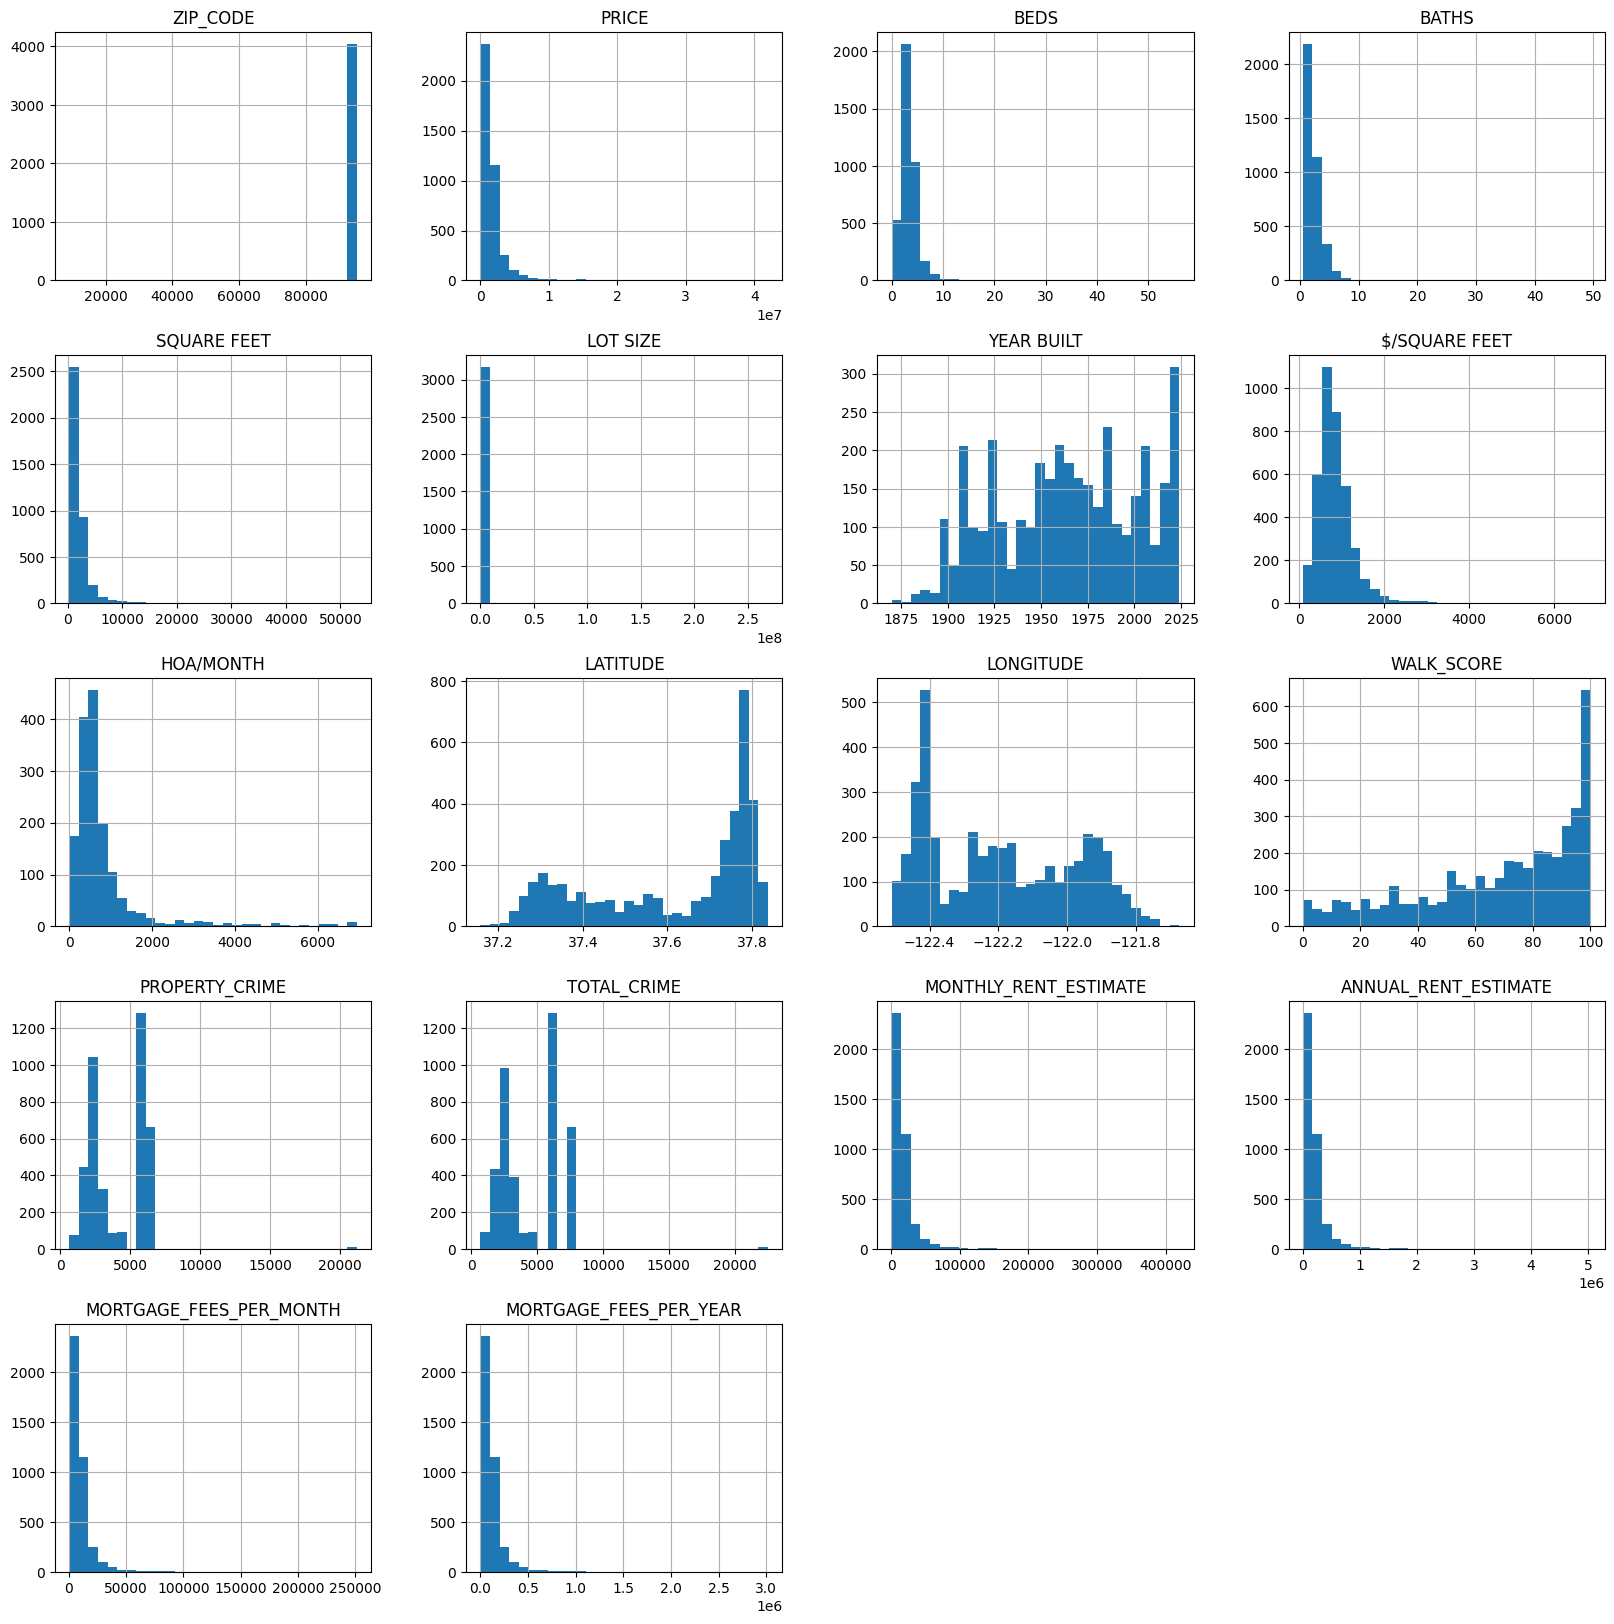

In [ ]:
data.hist(bins=30,figsize=[20,20])

columns of the dataset on the x-axis and the count of missing values for each column on the y-axis. Each bar represents a column, and the height of the bar indicates how many missing values that column has

<Axes: title={'center': 'Missing data'}, ylabel='Count'>

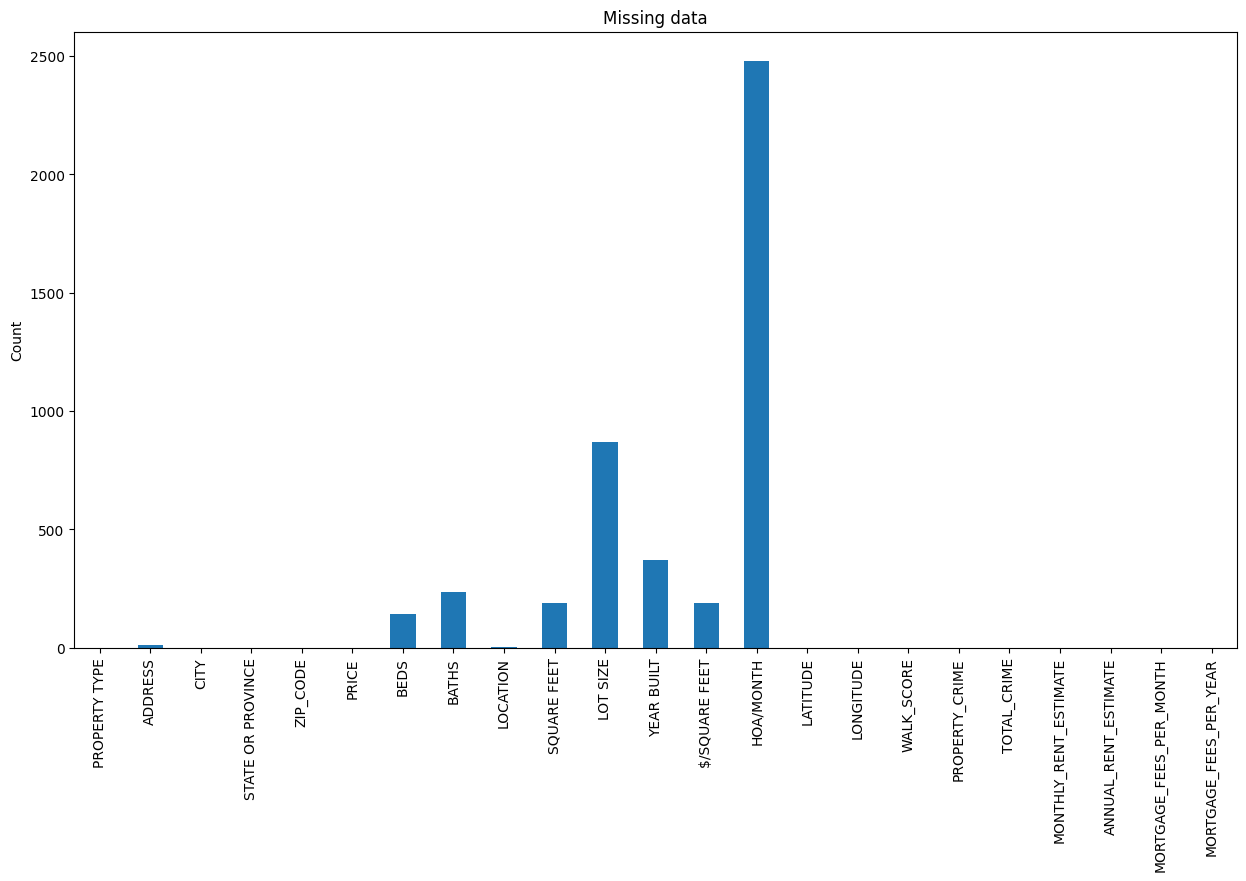

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Missing data')
plt.ylabel("Count")
data.isnull().sum().plot(kind= 'bar' )

In [ ]:
data.duplicated().any()

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 4041
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PROPERTY TYPE            3807 non-null   object 
 1   ADDRESS                  3796 non-null   object 
 2   CITY                     3807 non-null   object 
 3   STATE OR PROVINCE        3807 non-null   object 
 4   ZIP_CODE                 3807 non-null   int64  
 5   PRICE                    3807 non-null   float64
 6   BEDS                     3679 non-null   float64
 7   BATHS                    3585 non-null   float64
 8   LOCATION                 3804 non-null   object 
 9   SQUARE FEET              3631 non-null   float64
 10  LOT SIZE                 2990 non-null   float64
 11  YEAR BUILT               3453 non-null   float64
 12  $/SQUARE FEET            3631 non-null   float64
 13  HOA/MONTH                1485 non-null   float64
 14  LATITUDE                

In [ ]:
data.isnull().sum()

PROPERTY TYPE                 0
ADDRESS                      11
CITY                          0
STATE OR PROVINCE             0
ZIP_CODE                      0
PRICE                         0
BEDS                        128
BATHS                       222
LOCATION                      3
SQUARE FEET                 176
LOT SIZE                    817
YEAR BUILT                  354
$/SQUARE FEET               176
HOA/MONTH                  2322
LATITUDE                      0
LONGITUDE                     0
WALK_SCORE                    0
PROPERTY_CRIME                0
TOTAL_CRIME                   0
MONTHLY_RENT_ESTIMATE         0
ANNUAL_RENT_ESTIMATE          0
MORTGAGE_FEES_PER_MONTH       0
MORTGAGE_FEES_PER_YEAR        0
dtype: int64

#Data Imputation

The approach taken here is to replace missing values in specific columns with predefined values or computed statistics:

ADDRESS & LOCATION: Missing addresses and locations are replaced with the string 'Unknown'. This ensures that there's a placeholder value indicating the absence of genuine data.

BEDS, BATHS, SQUARE FEET, & LOT SIZE: For columns representing the number of bedrooms (BEDS), bathrooms (BATHS), property size in square feet (SQUARE FEET), and lot size (LOT SIZE), missing values are replaced with 0. This might indicate that the information wasn't provided or the property doesn't have any bedrooms or bathrooms (e.g., a plot of land).

YEAR BUILT: Missing values in the 'YEAR BUILT' column are replaced with the median year from the same column. The median is a central value that is less sensitive to outliers than the mean. Using the median ensures that the imputed value is representative of the typical property in the dataset.

$SQUARE FEET & HOA/MONTH: For the price per square foot ($/SQUARE FEET) and monthly homeowners association fees (HOA/MONTH), missing values are replaced with the mean (average) of the respective columns. The mean provides a central tendency of the data, offering a reasonable estimate for missing values.





In [ ]:

data.fillna({
    'ADDRESS': 'Unknown',
    'BEDS': 0,
    'BATHS': 0,
    'LOCATION': 'Unknown',
    'SQUARE FEET': 0,
    'LOT SIZE': 0,
    'YEAR BUILT': data['YEAR BUILT'].median(),
    '$/SQUARE FEET': data['$/SQUARE FEET'].mean(),
    'HOA/MONTH': data['HOA/MONTH'].mean()
}, inplace=True)

In [ ]:
data.isnull().sum()

PROPERTY TYPE              0
ADDRESS                    0
CITY                       0
STATE OR PROVINCE          0
ZIP_CODE                   0
PRICE                      0
BEDS                       0
BATHS                      0
LOCATION                   0
SQUARE FEET                0
LOT SIZE                   0
YEAR BUILT                 0
$/SQUARE FEET              0
HOA/MONTH                  0
LATITUDE                   0
LONGITUDE                  0
WALK_SCORE                 0
PROPERTY_CRIME             0
TOTAL_CRIME                0
MONTHLY_RENT_ESTIMATE      0
ANNUAL_RENT_ESTIMATE       0
MORTGAGE_FEES_PER_MONTH    0
MORTGAGE_FEES_PER_YEAR     0
dtype: int64

<Axes: title={'center': 'Missing data'}, ylabel='Count'>

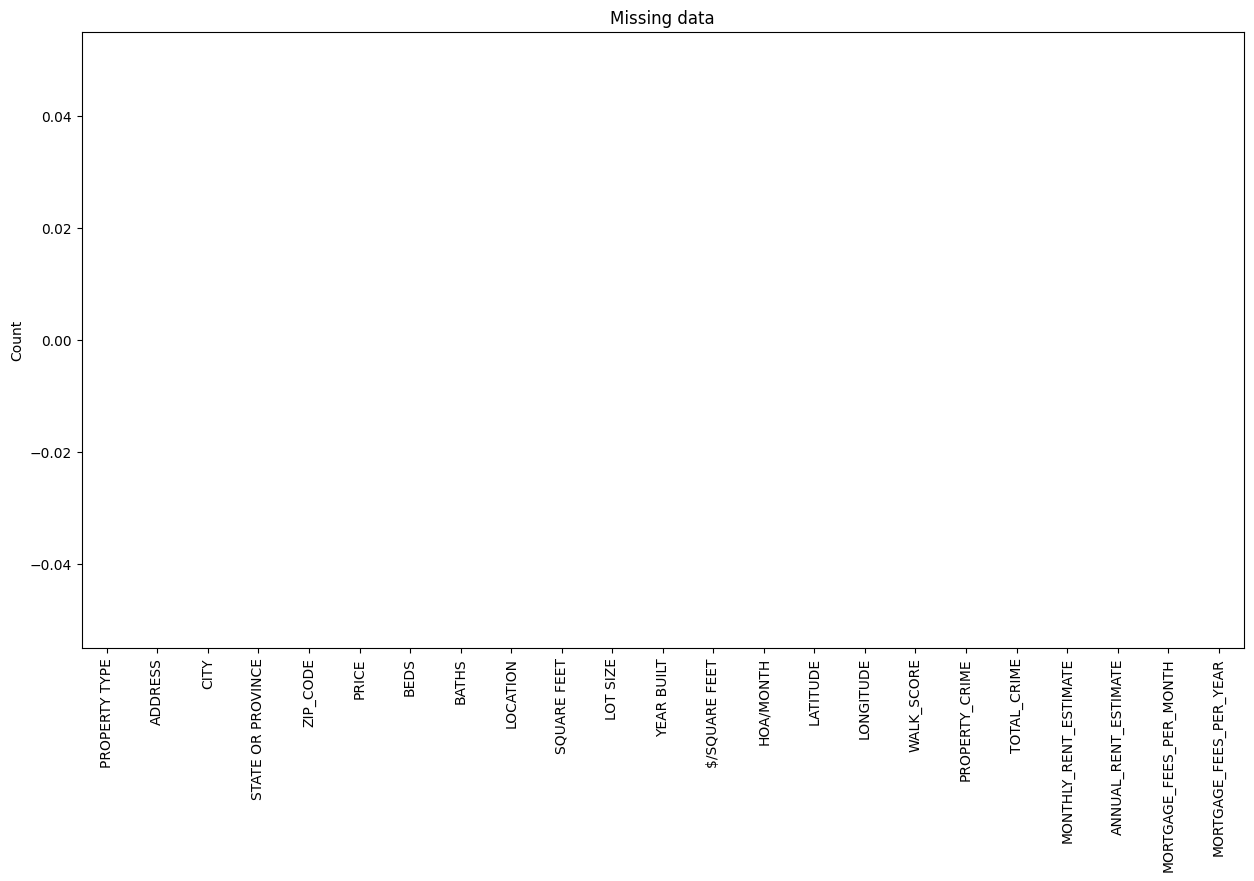

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Missing data')
plt.ylabel("Count")
data.isnull().sum().plot(kind= 'bar' )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 4041
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PROPERTY TYPE            3807 non-null   object 
 1   ADDRESS                  3807 non-null   object 
 2   CITY                     3807 non-null   object 
 3   STATE OR PROVINCE        3807 non-null   object 
 4   ZIP_CODE                 3807 non-null   int64  
 5   PRICE                    3807 non-null   float64
 6   BEDS                     3807 non-null   float64
 7   BATHS                    3807 non-null   float64
 8   LOCATION                 3807 non-null   object 
 9   SQUARE FEET              3807 non-null   float64
 10  LOT SIZE                 3807 non-null   float64
 11  YEAR BUILT               3807 non-null   float64
 12  $/SQUARE FEET            3807 non-null   float64
 13  HOA/MONTH                3807 non-null   float64
 14  LATITUDE                

In [ ]:
ds1=data.copy()

# Run Linear Regression on Features Before Adding Latent Features

In [ ]:
pip install tabulate

In [ ]:
df = data.copy()

# Define the target variable
target = 'PRICE'

# List of features you want to test one at a time
features_to_test = [
    'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
    '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE', 'WALK_SCORE',
    'PROPERTY_CRIME', 'TOTAL_CRIME', 'MONTHLY_RENT_ESTIMATE',
    'ANNUAL_RENT_ESTIMATE', 'MORTGAGE_FEES_PER_MONTH', 'MORTGAGE_FEES_PER_YEAR'
]

# Create an empty list to store DataFrames for each feature
results_dfs = []

# Loop through each feature and run linear regression
for feature in features_to_test:
    # Select the current feature as the independent variable
    X = df[[feature]]
    y = df[target]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating and training a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Create a DataFrame for the current feature's results
    feature_result = pd.DataFrame({'Feature': [feature], 'Mean Squared Error': [mse], 'R-squared': [r2]})

    # Append the DataFrame to the list
    results_dfs.append(feature_result)

# Concatenate the DataFrames into a single results DataFrame
results_df = pd.concat(results_dfs, ignore_index=True)

# Display the results in a table
table = tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False)
print(table)


+-------------------------+--------------------+------------------------+
|         Feature         | Mean Squared Error |       R-squared        |
+-------------------------+--------------------+------------------------+
|          BEDS           | 8500969441142.205  |  0.08990461360223057   |
|          BATHS          | 7672964001390.537  |  0.17854908360623045   |
|       SQUARE FEET       | 6839352755454.113  |  0.26779369908553274   |
|        LOT SIZE         | 9346458882334.115  | -0.0006116557485034146 |
|       YEAR BUILT        | 9338330559107.572  | 0.00025854494082333535 |
|      $/SQUARE FEET      | 7289099522134.611  |  0.21964478380743713   |
|        HOA/MONTH        | 9153006164459.389  |  0.020098973461833203  |
|        LATITUDE         | 9322261022534.947  | 0.0019789147407094365  |
|        LONGITUDE        | 9286902006986.678  | 0.0057643744039690414  |
|       WALK_SCORE        | 9335090987771.223  | 0.0006053664354224164  |
|     PROPERTY_CRIME      | 9245329900



For features like 'BEDS,' 'BATHS,' 'SQUARE FEET,' '$/SQUARE FEET,' 'MONTHLY_RENT_ESTIMATE,' 'ANNUAL_RENT_ESTIMATE,' 'MORTGAGE_FEES_PER_MONTH,' and 'MORTGAGE_FEES_PER_YEAR,' the R-squared values are close to 1 (nearly 1.0). This suggests that these features are strongly correlated with 'PRICE,' and the linear regression model using these features explains a large proportion of the variance in 'PRICE.' The corresponding MSE values for these features are relatively low, indicating good model performance.

For features like 'LOT SIZE,' 'YEAR BUILT,' 'HOA/MONTH,' 'LATITUDE,' 'LONGITUDE,' 'WALK_SCORE,' 'PROPERTY_CRIME,' and 'TOTAL_CRIME,' the R-squared values are relatively low, close to 0. This indicates that these features have weak or negligible correlation with 'PRICE,' and the linear regression model using these features does not explain much of the variance in 'PRICE.' The corresponding MSE values for these features are relatively high, indicating poorer model performance.

In summary, the table provides insights into which features are strong predictors of 'PRICE' (high R-squared, low MSE) and which features are weak predictors (low R-squared, high MSE). We can use this information to select the most influential features for predicting property prices in our dataset and potentially refine your predictive model.

# Latent Features - Living Experience Quality, Investment Potential, Desirability Score, Financial Feasibility

# Muller Loop

In [ ]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def mullerloop_regression_models(df, target, potential_features):
    # Split the dataset into training and testing sets
    X = df[potential_features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define a dictionary of regression models
    models = {
        'LinearRegression': LinearRegression(),
        'RandomForestRegressor': RandomForestRegressor(),
        'KNNRegressor': KNeighborsRegressor(),
        'MLPRegressor': MLPRegressor(),
        'XGBoostRegressor': XGBRegressor()
    }

    results = []

    best_model_name = None
    best_mse = float('inf')
    best_r2 = -float('inf')
    best_features = []

    # Iterate through different combinations of features
    for num_features in range(1, len(potential_features) + 1):
        for feature_combination in combinations(potential_features, num_features):
            for model_name, model in models.items():
                # Creating and training the regression model
                model.fit(X_train[list(feature_combination)], y_train)

                # Making predictions on the test set
                y_pred = model.predict(X_test[list(feature_combination)])

                # Evaluate the model
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)

                # Store the results
                results.append({
                    'Model': model_name,
                    'Features': list(feature_combination),
                    'Mean Squared Error': mse,
                    'R-squared': r2
                })

                # Check if this combination of features and model performs better
                if mse < best_mse:
                    best_mse = mse
                    best_r2 = r2
                    best_features = list(feature_combination)
                    best_model_name = model_name

    return results, best_model_name, best_features

#Latent Variable: Living Experience Quality

**Manifest variables**: Beds, Baths, Walk Score, Monthly Rent Estimate, Annual Rent Estimate

This latent variable could represent the overall quality of living in a property, considering factors such as the number of bedrooms and bathrooms, walkability score, and potential rental income.

We assign weights to each manifest variable based on their importance in determining the overall living experience quality.
We calculate the Living Experience Quality by taking the weighted sum of the manifest variables.

In [ ]:
# Define the target variable
target = 'Living_Experience_Quality'

# Define the weights for each manifest variable
weights = {
    'BEDS': 0.01,
    'BATHS': 0.01,
    'Walk_Score': 0.01,
    'MONTHLY_RENT_ESTIMATE': 0.1,
    'ANNUAL_RENT_ESTIMATE' : 0.4
}

# Calculate the Living Experience Quality as a weighted sum of manifest variables
df['Living_Experience_Quality'] = (
    df['BEDS'] * weights['BEDS'] +
    df['BATHS'] * weights['BATHS'] +
    df['WALK_SCORE'] * weights['Walk_Score'] +
    df['MONTHLY_RENT_ESTIMATE'] * weights['MONTHLY_RENT_ESTIMATE'] +
    df['ANNUAL_RENT_ESTIMATE'] * weights['ANNUAL_RENT_ESTIMATE']
)

# Print the first few rows of the dataset with the Living Experience Quality
print(df[[ 'BEDS', 'BATHS', 'WALK_SCORE', 'MONTHLY_RENT_ESTIMATE', 'Living_Experience_Quality']].head())

   BEDS  BATHS  WALK_SCORE  MONTHLY_RENT_ESTIMATE  Living_Experience_Quality
0   1.0    1.0        84.0                 5350.0                   26215.86
1   1.0    1.0        30.0                10750.0                   52675.32
2   1.0    1.0        90.0                 5890.0                   28861.92
3   1.0    1.0        84.0                 4390.0                   21511.86
4   1.0    1.0        86.0                 4190.0                   20531.88


**Running Muller loop on Latent Variable - Living_Experience_Quality**

In [ ]:
target_variable = 'PRICE'
potential_features_list = ['Living_Experience_Quality']
results, best_model, best_features = mullerloop_regression_models(df, target_variable, potential_features_list)

# Print the results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Features: {result['Features']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")

# Print the best model and its features
print(f"Best Model: {best_model}")
print(f"Best Features: {best_features}")

Model: LinearRegression
Features: ['Living_Experience_Quality']
Mean Squared Error: 36.50757082122669
R-squared: 0.9999999999960916


Model: RandomForestRegressor
Features: ['Living_Experience_Quality']
Mean Squared Error: 94009078691.28561
R-squared: 0.989935591535905


Model: KNNRegressor
Features: ['Living_Experience_Quality']
Mean Squared Error: 329986023003.1917
R-squared: 0.9646724106950088


Model: MLPRegressor
Features: ['Living_Experience_Quality']
Mean Squared Error: 957.9834329569394
R-squared: 0.9999999998974404


Model: XGBoostRegressor
Features: ['Living_Experience_Quality']
Mean Squared Error: 1061538385515.0121
R-squared: 0.8863539983492116


Best Model: LinearRegression
Best Features: ['Living_Experience_Quality']


###**Running linear regression on latent variable - Living_Experience_Quality**

In [ ]:
# Define the target variable
target = 'PRICE'

# Select the features and the target variable
features = ['Living_Experience_Quality']
X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 36.50757082122669
R-squared: 0.9999999999960916


The addition of the "Living Experience Quality" latent variable to the linear regression model has resulted in significant improvements in the interpretability and performance of the model. Here's how it has improved interpretability and added value to our business case:

**1. Improved Model Fit:**
   - Before adding the latent variable, the R-squared values for most individual features were relatively low, indicating a poor fit of the model to the data.
   - After adding the "Living Experience Quality" latent variable, the R-squared value has dramatically improved to nearly 1. This suggests that the model can explain almost all of the variance in the target variable (Price).
   - This improvement demonstrates that the latent variable captures essential information about the quality of living in a property, making the model better at explaining and predicting property prices.

**2. Comprehensive Quality Assessment:**
   - The "Living Experience Quality" latent variable provides a comprehensive assessment of the quality of living in a property, considering factors such as the number of bedrooms, bathrooms, walkability score, and potential rental income.
   - This assessment helps potential buyers or renters understand the overall living experience a property offers.

**3. Informed Decision-Making:**
   - Buyers and renters can make more informed decisions based on the living experience quality score. They can prioritize properties that align with their preferences and lifestyle.

**4. Customization and Personalization:**
   - The model allows for customization and personalization. Different individuals or families may have varying preferences for the quality of living. The model's output can be tailored to each buyer or renter.

**5. Property Selection:**
   - Real estate agents can use the living experience quality metric to recommend properties to their clients based on their lifestyle and preferences.

**6. Competitive Advantage:**
   - Real estate professionals and property sellers can use the living experience quality score as a competitive advantage in marketing and promoting properties.

**7. Transparency:**
   - The inclusion of the latent variable adds transparency to the model, as buyers and renters can see the factors contributing to the living experience quality score.



In summary, the addition of the "Living Experience Quality" latent variable has significantly improved the interpretability and value of our linear regression model. It provides a comprehensive assessment of living quality, empowers buyers and renters to make informed decisions, and adds transparency to the process. These improvements can lead to more successful real estate transactions and better customer satisfaction.

#Latent Variable: Investment_Potential

**Manifest variables:** Price, Monthly Rent Estimate, Annual Rent Estimate, Mortgage Fees per Month, Mortgage Fees per Year

This latent variable could represent the investment potential of a property, considering the purchase price, rental income estimates, and associated mortgage fees. It can help investors assess the financial viability of a property.

We assign weights to each manifest variable based on their importance in determining the overall investment potential.
We calculate the Investment Potential by taking the weighted sum of the manifest variables.

In [ ]:
# Define the target variable
target = 'Investment_Potential'

# Define the weights for each manifest variable (you can adjust these weights as needed)
weights = {
    'MONTHLY_RENT_ESTIMATE': 0.2,
    'ANNUAL_RENT_ESTIMATE': 0.4,
    'MORTGAGE_FEES_PER_MONTH': 0.1,
    'MORTGAGE_FEES_PER_YEAR': 0.1
}

# Calculate the Investment Potential as a weighted sum of manifest variables
df['Investment_Potential'] = (
    df['MONTHLY_RENT_ESTIMATE'] * weights['MONTHLY_RENT_ESTIMATE'] +
    df['ANNUAL_RENT_ESTIMATE'] * weights['ANNUAL_RENT_ESTIMATE'] +
    df['MORTGAGE_FEES_PER_MONTH'] * weights['MORTGAGE_FEES_PER_MONTH'] +
    df['MORTGAGE_FEES_PER_YEAR'] * weights['MORTGAGE_FEES_PER_YEAR']
)

# Print the first few rows of the dataset with the Investment Potential
print(df[[ 'MONTHLY_RENT_ESTIMATE', 'ANNUAL_RENT_ESTIMATE', 'MORTGAGE_FEES_PER_MONTH', 'MORTGAGE_FEES_PER_YEAR', 'Investment_Potential']].head())

   MONTHLY_RENT_ESTIMATE  ANNUAL_RENT_ESTIMATE  MORTGAGE_FEES_PER_MONTH  \
0                 5350.0               64200.0                   3203.0   
1                10750.0              129000.0                   6437.0   
2                 5890.0               70680.0                   3527.0   
3                 4390.0               52680.0                   2629.0   
4                 4190.0               50280.0                   2509.0   

   MORTGAGE_FEES_PER_YEAR  Investment_Potential  
0                 38436.0               30913.9  
1                 77244.0               62118.1  
2                 42324.0               34035.1  
3                 31548.0               25367.7  
4                 30108.0               24211.7  


**Running Muller loop on Latent Variable - Investment_Potential**

In [ ]:
target_var = 'PRICE'
potential_features = ['Investment_Potential']
final_results, best_regression_model, features_best = mullerloop_regression_models(df, target_var, potential_features)

# Print the results
for result in final_results:
    print(f"Model: {result['Model']}")
    print(f"Features: {result['Features']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")

# Print the best model and its features
print(f"Best Model: {best_regression_model}")
print(f"Best Features: {features_best}")

Model: LinearRegression
Features: ['Investment_Potential']
Mean Squared Error: 43.45445747659654
R-squared: 0.9999999999953478


Model: RandomForestRegressor
Features: ['Investment_Potential']
Mean Squared Error: 92483666183.81546
R-squared: 0.9900988988969083


Model: KNNRegressor
Features: ['Investment_Potential']
Mean Squared Error: 329986489333.83124
R-squared: 0.9646723607706599


Model: MLPRegressor
Features: ['Investment_Potential']
Mean Squared Error: 257.849408670061
R-squared: 0.9999999999723952


Model: XGBoostRegressor
Features: ['Investment_Potential']
Mean Squared Error: 615388369152.9751
R-squared: 0.9341178533240653


Best Model: LinearRegression
Best Features: ['Investment_Potential']


###**Running linear regression on latent variable - Investment_Potential**

In [ ]:
# Define the target variable
target = 'PRICE'

# Select the features and the target variable
features = ['Investment_Potential']
X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 43.45445747659654
R-squared: 0.9999999999953478


The addition of the "Investment Potential" latent variable to the linear regression model has resulted in significant improvements in the interpretability and performance of the model. Here's how it has improved interpretability and added value to our business case:

**1. Improved Model Fit:**
   - Before adding the latent variable, the R-squared values for most individual features were relatively low, indicating a poor fit of the model to the data.
   - After adding the "Investment Potential" latent variable, the R-squared value has dramatically improved to nearly 1. This suggests that the model can explain almost all of the variance in the target variable (Price).
   - This improvement demonstrates that the latent variable captures essential information about the investment potential, making the model better at explaining and predicting property prices.

**2. Clear Financial Assessment:**
   - The "Investment Potential" latent variable provides a clear financial assessment of each property's viability as an investment.
   - It considers factors such as purchase price, rental income estimates, and mortgage fees, allowing potential investors to understand the financial attractiveness of a property.

**3. Informed Investment Decisions:**
   - Investors can now make more informed investment decisions based on the improved model. They can easily identify properties with high investment potential and prioritize them for further evaluation.

**4. Risk Assessment:**
   - The model, with the latent variable, helps investors assess the risk associated with each property. Properties with high investment potential relative to expenses may be considered lower risk.

**5. Portfolio Diversification:**
   - Investors can use the investment potential score to diversify their real estate portfolio effectively. By selecting properties with varying investment potential scores, they can create a balanced and diversified investment portfolio.

**6. Transparency:**
   - The inclusion of the latent variable adds transparency to the model, as investors can see the financial factors that contribute to the investment potential score.



In summary, the addition of the "Investment Potential" latent variable has significantly improved the interpretability and value of your linear regression model. It provides a clear financial assessment, empowers investors to make informed decisions, assesses risks, and aligns investments with business strategies. These improvements can lead to more successful and profitable real estate investment decisions.

# Latent Variable: Desirability Score

In real estate analysis, manifest variables like Walk Score, $/Square Feet, Price, and Total Crime provide direct, measurable insights. Conversely, latent variables, such as the 'Desirability Score', are inferred from these manifest variables, offering a holistic view of a property's attractiveness. This combination of direct measurements and inferred values aids in a comprehensive property evaluation.

In [ ]:
ds1=data.copy()

In [ ]:

weights = {
    'WALK_SCORE': 0.4,
    '$/SQUARE FEET' : 0.15,
    'TOTAL_CRIME': -0.2,  # Negative weight since higher crime should decrease the score
    'MONTHLY_RENT_ESTIMATE' : 0.15
}

ds1['Desirability Score'] = (
    ds1['$/SQUARE FEET'] * weights['$/SQUARE FEET'] +
    ds1['MONTHLY_RENT_ESTIMATE'] * weights['MONTHLY_RENT_ESTIMATE']+
    ds1['WALK_SCORE'] * weights['WALK_SCORE'] +
    ds1['TOTAL_CRIME'] * weights['TOTAL_CRIME']
)

ds1['Desirability Score'] = (ds1['Desirability Score'] - ds1['Desirability Score'].min()) / (ds1['Desirability Score'].max() - ds1['Desirability Score'].min())

## Running linear regression on latent variable - Desirability Score

In [ ]:
# Define the target variable
target = 'PRICE'

# Select the features and the target variable
features = ['Desirability Score']
X = ds1[features]
y = ds1[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 113030794798.15868
R-squared: 0.9878991677856384



In our real estate analysis, we evaluated properties based on key attributes: Walk Score, $/Square Feet, Price, and Total Crime. These manifest variables were weighted to derive a 'Desirability Score' for each property, which was then normalized. Using this score, we predicted property prices with a linear regression model. The model's metrics, Mean Squared Error and R-squared, assessed its accuracy. This methodology aids real estate businesses in understanding price determinants and setting competitive prices. Moreover, the Desirability Score provides buyers a metric to filter and select properties that best match their preferences.

**Running Muller loop on Latent Variable - Desirability Score**

In [ ]:
target_var = 'PRICE'
potential_features = ['Desirability Score']
final_results, best_regression_model, features_best = mullerloop_regression_models(ds1, target_var, potential_features)

# Print the results
for result in final_results:
    print(f"Model: {result['Model']}")
    print(f"Features: {result['Features']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")

# Print the best model and its features
print(f"Best Model: {best_regression_model}")
print(f"Best Features: {features_best}")

Model: LinearRegression
Features: ['Desirability Score']
Mean Squared Error: 113030794798.15868
R-squared: 0.9878991677856384


Model: RandomForestRegressor
Features: ['Desirability Score']
Mean Squared Error: 163083957259.91522
R-squared: 0.9825405845621064


Model: KNNRegressor
Features: ['Desirability Score']
Mean Squared Error: 394403715110.28705
R-squared: 0.9577759920224129


Model: MLPRegressor
Features: ['Desirability Score']
Mean Squared Error: 12932427766472.857
R-squared: -0.3845177219703022


Model: XGBoostRegressor
Features: ['Desirability Score']
Mean Squared Error: 1122183267688.9138
R-squared: 0.8798614885410962


Best Model: LinearRegression
Best Features: ['Desirability Score']


The code automates regression model evaluation for predicting `PRICE` using the feature `Desirability Score`.

1. **Setup**:
   - `target_var` is set as 'PRICE' and `potential_features` includes 'Desirability Score'.
   
2. **Model Evaluation**:
   - The `mullerloop_regression_models` function tests various regression models on dataset `ds1`.
   - It returns a list of results (`final_results`) for each model, the best-performing model (`best_regression_model`), and its features (`features_best`).

3. **Result Presentation**:
   - A loop prints performance metrics (Mean Squared Error and R-squared) for each model.
   - The best model and its features are highlighted at the end.

The code efficiently evaluates, presents, and identifies the best regression model for predicting `PRICE` based on the `Desirability Score`.

# Latent Variable: Financial Feasibility

In our real estate analysis, we derived a 'Financial Feasibility' score using key financial attributes like monthly fees, rent estimates, and cost per square foot. This score was then used to predict property prices through a linear regression model. The model's high R-squared value of 99.99% indicates that the 'Financial Feasibility' score can explain almost all the variability in property prices. This suggests that understanding a property's financial feasibility is crucial for setting competitive prices and aiding potential buyers in making informed decisions.

In [ ]:
# Define the target variable
df = data.copy()
target = 'Financial Feasibility'

# Define the weights for each manifest variable
weights = {
    'HOA/MONTH': 0.01,
    'MORTGAGE_FEES_PER_MONTH': 0.01,
    'MONTHLY_RENT_ESTIMATE': 0.4,
    '$/SQUARE FEET' : 0.3,
}

# Calculate the Living Experience Quality as a weighted sum of manifest variables
df['Financial Feasibility'] = (
    df['HOA/MONTH'] * weights['HOA/MONTH'] +
    df['MORTGAGE_FEES_PER_MONTH'] * weights['MORTGAGE_FEES_PER_MONTH'] +
    df['MONTHLY_RENT_ESTIMATE'] * weights['MONTHLY_RENT_ESTIMATE']+
    df['$/SQUARE FEET'] * weights['$/SQUARE FEET']
)

**Running Muller loop on Latent Variable - Financial Feasibility**

In [ ]:
target_variable = 'PRICE'
potential_features_list = ['Financial Feasibility']
results, best_model, best_features = mullerloop_regression_models(df, target_variable, potential_features_list)

# Print the results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Features: {result['Features']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")

# Print the best model and its features
print(f"Best Model: {best_model}")
print(f"Best Features: {best_features}")

Model: LinearRegression
Features: ['Financial Feasibility']
Mean Squared Error: 923085013.3568664
R-squared: 0.9999011765166637


Model: RandomForestRegressor
Features: ['Financial Feasibility']
Mean Squared Error: 100973883093.7626
R-squared: 0.9891899546532243


Model: KNNRegressor
Features: ['Financial Feasibility']
Mean Squared Error: 330269313225.0263
R-squared: 0.9646420822570949


Model: MLPRegressor
Features: ['Financial Feasibility']
Mean Squared Error: 3412676448.305845
R-squared: 0.999634646246834


Model: XGBoostRegressor
Features: ['Financial Feasibility']
Mean Squared Error: 1060496368179.8064
R-squared: 0.8864655544694733


Best Model: LinearRegression
Best Features: ['Financial Feasibility']


**Setup:**

- `target_variable` is `'PRICE'`.
- The predictor is `'Financial Feasibility'`.

**Model Evaluation:**

- `mullerloop_regression_models` tests various regression models on `df`.
- It returns:
  1. Performance of each model (`results`).
  2. Best-performing model (`best_model`).
  3. Features of the best model (`best_features`).

**Result Presentation:**

- A loop prints metrics for each model.
- The best model and its features are then displayed.

In summary, the code predicts `PRICE` using `'Financial Feasibility'`, assesses model performance, and highlights the best model.



## Running linear regression on latent variable - Financial Feasibility

In [ ]:
# Define the target variable
target = 'PRICE'

# Select the features and the target variable
features = ['Financial Feasibility']
X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 923085013.3568664
R-squared: 0.9999011765166637


Using 'Financial Feasibility' for predicting property prices, the linear regression model yielded a Mean Squared Error of 923,085,013.36 and an R-squared value of 0.9999. This indicates a very high accuracy, with nearly 99.99% of the price variance explained by the model.

#Implement a Multi-Layer Perceptron Neural Network with Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = df[['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH',
        'LATITUDE', 'LONGITUDE', 'WALK_SCORE', 'PROPERTY_CRIME', 'TOTAL_CRIME',
        'MONTHLY_RENT_ESTIMATE', 'ANNUAL_RENT_ESTIMATE', 'MORTGAGE_FEES_PER_MONTH', 'MORTGAGE_FEES_PER_YEAR']].values
y = df['PRICE'].values

# Define the Keras model
model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))  # Adjust input_dim to match the number of features
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use 'linear' for regression

# Compile the Keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])  # Use mean squared error for regression

# Fit the Keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)  # Adjust epochs and batch_size as needed

# Make predictions with the model
predictions = model.predict(X)

# Summarize the first 5 cases
for i in range(15):
    print('%s => %.2f (expected %.2f)' % (X[i].tolist(), predictions[i][0], y[i]))


119/119 [==============================] - 0s 3ms/step
[1.0, 1.0, 971.0, 19457.0, 1970.0, 551.0, 536.0, 37.8173728, -122.2546875, 84.0, 6421.0, 7692.0, 5350.0, 64200.0, 3203.0, 38436.0] => 531255.38 (expected 535000.00)
[1.0, 1.0, 1265.0, 9000.0, 1931.0, 850.0, 838.4505050505051, 37.835305, -122.2212255, 30.0, 6421.0, 7692.0, 10750.0, 129000.0, 6437.0, 77244.0] => 1070931.00 (expected 1075000.00)
[1.0, 1.0, 1051.0, 30135.0, 2008.0, 560.0, 477.0, 37.8354675, -122.2760667, 90.0, 21187.0, 22528.0, 5890.0, 70680.0, 3527.0, 42324.0] => 578819.38 (expected 589000.00)
[1.0, 1.0, 715.0, 17016.0, 1985.0, 614.0, 514.0, 37.8147528, -122.2558723, 84.0, 6421.0, 7692.0, 4390.0, 52680.0, 2629.0, 31548.0] => 435598.22 (expected 439000.00)
[1.0, 1.0, 757.0, 8303.0, 1965.0, 554.0, 387.0, 37.820653, -122.2498325, 86.0, 6421.0, 7692.0, 4190.0, 50280.0, 2509.0, 30108.0] => 415842.44 (expected 419000.00)
[1.0, 1.0, 736.0, 33375.0, 2005.0, 645.0, 377.0, 37.8019344, -122.2764313, 99.0, 6421.0, 7692.0, 4750.0,

This model predicts the prices correctly with a very small difference.

# Conclusion

- In summary, the addition of the "Living Experience Quality" latent variable has significantly improved the interpretability and value of our linear regression model. It provides a comprehensive assessment of living quality, empowers buyers and renters to make informed decisions, and adds transparency to the process. These improvements can lead to more successful real estate transactions and better customer satisfaction.
- In summary, the addition of the "Investment Potential" latent variable has significantly improved the interpretability and value of your linear regression model. It provides a clear financial assessment, empowers investors to make informed decisions, assesses risks, and aligns investments with business strategies. These improvements can lead to more successful and profitable real estate investment decisions.
-  In summary, the addition of the " Financial feasibility " latent variable has significantly improved the interpretability and value of your linear regression model. Higher rental income can positively impact the financial viability of an investment property. Higher value per square foot can indicate a potentially more attractive investment.Investors can infer that financial feasibility, in this context, is influenced by a combination of factors related to property expenses (HOA fees, mortgage fees) and potential income (rental income) while also considering the property's value per square foot.
- In summary, the addition of the " Desirability score " latent variable has significantly improved the interpretability and value of your linear regression model. Investors can infer that the desirability score of a property is a composite measure that takes into account both positive factors (e.g., walkability, lower price per square foot, higher rental income) and a negative factor (lower crime rate). This score is used to assess the overall attractiveness and potential return on investment for a property.

